### Name: Jiten Sidhpura 
### UID: 2018130051
### Batch B
### BE COMPS

### Objective: To carry out logistic regression and build a classification model using Python Platform

## Imports

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

## Reading Data

In [4]:
filename = 'horse.csv'

dataset = pd.read_csv(filename)

dataset.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [5]:
dataset.dtypes

surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object

## Drop Duplicates If Present

In [6]:
dataset = dataset.drop_duplicates()

In [7]:
dataset.skew()

C:\Users\jiten\AppData\Local\Temp/ipykernel_16608/4231230252.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.skew()


hospital_number           2.394354
rectal_temp               0.030647
pulse                     1.018127
respiratory_rate          1.636583
nasogastric_reflux_ph    -0.354427
packed_cell_volume        0.695830
total_protein             1.009973
abdomo_protein            1.404909
lesion_1                  4.337764
lesion_2                  8.299111
lesion_3                 17.291616
dtype: float64

<AxesSubplot:>

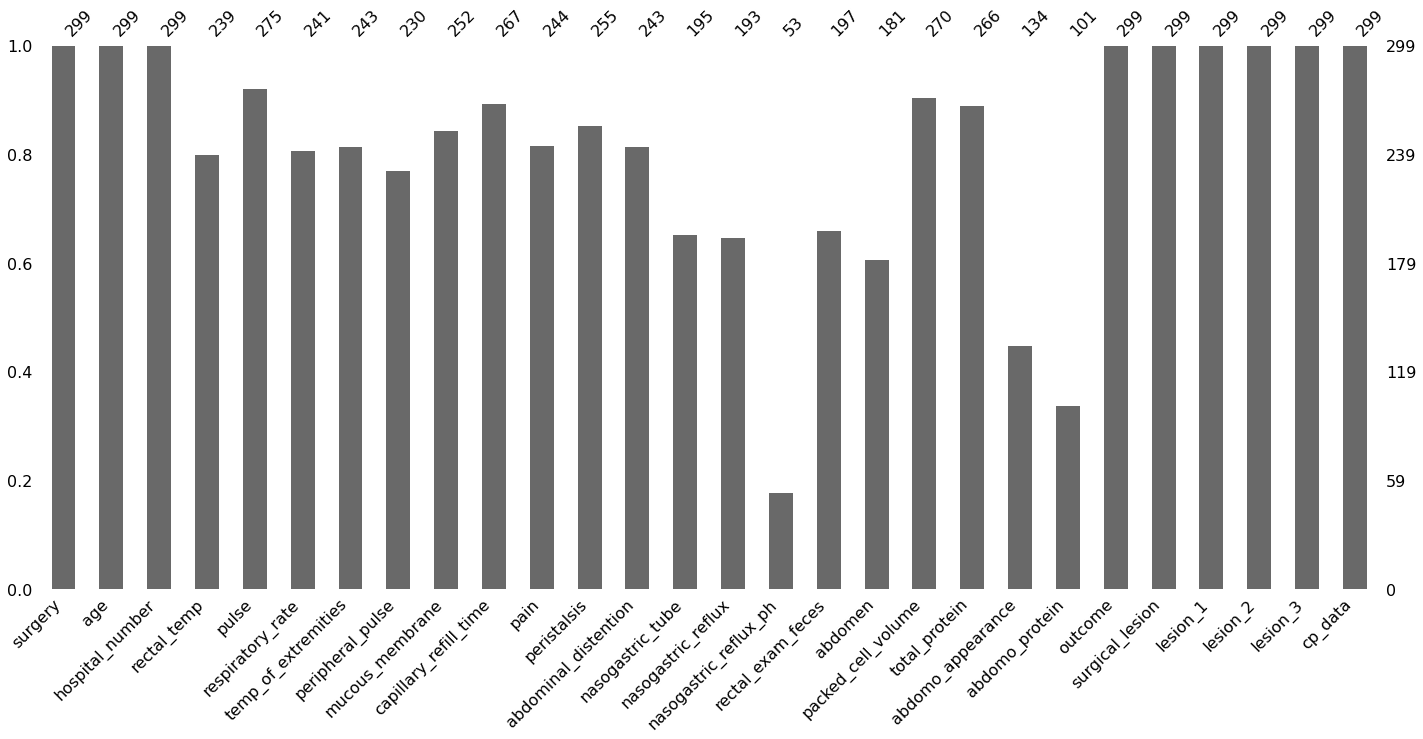

In [8]:
import missingno
missingno.bar(dataset)

In [9]:
from scipy.special import boxcox, inv_boxcox

def modify_boxcox_value(col_name, x):
    print(dataset[col_name].skew())
    sns.distplot(dataset[col_name])
    plt.show()
    
    transformed_value = boxcox(dataset[col_name], x)
    print(transformed_value.skew())
    sns.distplot(transformed_value)
    plt.show()

## Outcome Feature

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='outcome', ylabel='count'>

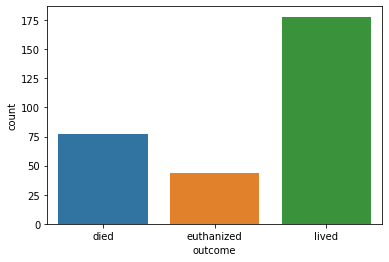

In [10]:
sns.countplot(dataset['outcome'])

## Converting Categorical Data to Numerical

In [11]:
dataset['outcome'] = dataset['outcome'].map({
    'died': 0,
    'euthanized': 1,
    'lived': 2,
})

In [12]:
dataset.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,0,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,1,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,2,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,0,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,0,no,4300,0,0,no


## Surgery Feature

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='surgery', ylabel='count'>

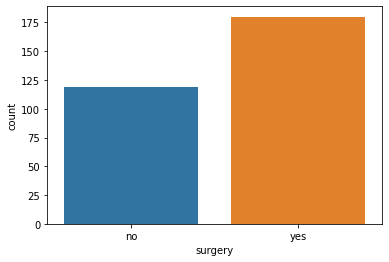

In [13]:
sns.countplot(dataset['surgery'])

In [14]:
dataset['surgery'].value_counts()

yes    180
no     119
Name: surgery, dtype: int64

In [15]:
dataset[dataset['surgery'] == 'no']['outcome'].value_counts()

2    83
0    19
1    17
Name: outcome, dtype: int64

In [16]:
dataset[dataset['surgery'] == 'yes']['outcome'].value_counts()

2    95
0    58
1    27
Name: outcome, dtype: int64

## If surgery is performed then chances of euthanized rises significantly

## Convert surgery Feature to  Numerical

In [17]:
yes_no_dict = {
    'no': 0,
    'yes': 1
}

dataset['surgery'] = dataset['surgery'].map(yes_no_dict)

In [18]:
dataset.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,0,no,11300,0,0,no
1,1,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,1,no,2208,0,0,no
2,0,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,2,no,0,0,0,yes
3,1,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,0,yes,2208,0,0,yes
4,0,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,0,no,4300,0,0,no


## Age Feature

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

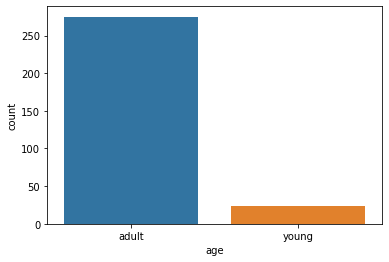

In [19]:
sns.countplot(dataset['age'])

In [20]:
dataset[dataset['age'] == 'adult']['outcome'].value_counts()

2    166
0     66
1     43
Name: outcome, dtype: int64

In [21]:
dataset[dataset['age'] == 'young']['outcome'].value_counts()

2    12
0    11
1     1
Name: outcome, dtype: int64

In [22]:
dataset.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,0,no,11300,0,0,no
1,1,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,1,no,2208,0,0,no
2,0,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,2,no,0,0,0,yes
3,1,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,0,yes,2208,0,0,yes
4,0,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,0,no,4300,0,0,no


## hospital_number Feature

## hospital_number is case id given to horse 

## we can see some horses are treated in hospital multiple times

In [23]:
treatment_frequencies = dict(dataset['hospital_number'].value_counts())

In [24]:
dataset['TreatedMultipleTimes'] = dataset['hospital_number'].apply(lambda x: treatment_frequencies[x])

In [25]:
dataset['TreatedMultipleTimes'].unique()

array([1, 2], dtype=int64)

In [26]:
dataset.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,TreatedMultipleTimes
0,0,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,8.4,NaN,NaN,0,no,11300,0,0,no,1
1,1,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,85.0,cloudy,2.0,1,no,2208,0,0,no,1
2,0,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,6.7,NaN,NaN,2,no,0,0,0,yes,1
3,1,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,7.2,serosanguious,5.3,0,yes,2208,0,0,yes,1
4,0,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,7.4,NaN,NaN,0,no,4300,0,0,no,1


## Fetch the Dataframe when horses are treated are twice

In [27]:
multiple_times_horse = dataset[dataset['TreatedMultipleTimes'] == 2]
multiple_times_horse

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,TreatedMultipleTimes
26,1,adult,530526,38.3,72.0,30.0,cold,reduced,pale_pink,more_3_sec,...,7.0,cloudy,3.9,2,yes,3111,0,0,yes,2
34,1,adult,529796,NaN,100.0,30.0,cool,reduced,pale_cyanotic,more_3_sec,...,6.6,NaN,NaN,2,yes,1124,0,0,no,2
38,0,adult,528996,38.6,52.0,NaN,normal,normal,normal_pink,less_3_sec,...,6.6,clear,5.0,2,no,0,0,0,yes,2
48,1,adult,528890,38.9,80.0,44.0,cool,reduced,pale_pink,more_3_sec,...,6.5,serosanguious,NaN,0,yes,7111,0,0,no,2
54,0,adult,529461,40.3,114.0,36.0,cool,reduced,normal_pink,more_3_sec,...,8.1,serosanguious,4.5,1,yes,7400,0,0,yes,2
59,0,adult,528904,NaN,96.0,NaN,cool,reduced,pale_pink,more_3_sec,...,NaN,NaN,NaN,0,yes,4205,0,0,no,2
67,0,adult,528931,38.4,54.0,24.0,normal,normal,normal_pink,less_3_sec,...,7.2,clear,NaN,2,no,3111,0,0,yes,2
71,1,adult,529424,37.8,48.0,28.0,normal,normal,normal_pink,less_3_sec,...,5.9,cloudy,7.0,2,no,0,0,0,yes,2
73,1,adult,528469,38.1,52.0,24.0,normal,normal,bright_red,less_3_sec,...,7.5,cloudy,2.6,0,yes,2112,0,0,yes,2
78,1,adult,530693,NaN,NaN,NaN,cool,reduced,pale_pink,3,...,5.9,NaN,NaN,0,yes,3025,0,0,no,2


## 16 Unique Horses 

In [28]:
multiple_times_horse['hospital_number'].unique()

array([ 530526,  529796,  528996,  528890,  529461,  528904,  528931,
        529424,  528469,  530693, 5279822,  528729,  527544,  532349,
        527916,  528151], dtype=int64)

In [29]:
horse_hospital_id = 528996

multiple_times_horse[multiple_times_horse['hospital_number'] == horse_hospital_id]

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,TreatedMultipleTimes
38,0,adult,528996,38.6,52.0,NaN,normal,normal,normal_pink,less_3_sec,...,6.6,clear,5.0,2,no,0,0,0,yes,2
155,0,adult,528996,38.6,52.0,20.0,normal,normal,normal_pink,less_3_sec,...,6.6,clear,5.0,2,no,0,0,0,yes,2


In [30]:
for col in dataset.columns:
    print(dataset[(dataset['TreatedMultipleTimes'] == 2) & (dataset['hospital_number'] == horse_hospital_id)][col])

38     0
155    0
Name: surgery, dtype: int64
38     adult
155    adult
Name: age, dtype: object
38     528996
155    528996
Name: hospital_number, dtype: int64
38     38.6
155    38.6
Name: rectal_temp, dtype: float64
38     52.0
155    52.0
Name: pulse, dtype: float64
38      NaN
155    20.0
Name: respiratory_rate, dtype: float64
38     normal
155    normal
Name: temp_of_extremities, dtype: object
38     normal
155    normal
Name: peripheral_pulse, dtype: object
38     normal_pink
155    normal_pink
Name: mucous_membrane, dtype: object
38     less_3_sec
155    less_3_sec
Name: capillary_refill_time, dtype: object
38     mild_pain
155    mild_pain
Name: pain, dtype: object
38     hypomotile
155    hypomotile
Name: peristalsis, dtype: object
38     slight
155    slight
Name: abdominal_distention, dtype: object
38     none
155    none
Name: nasogastric_tube, dtype: object
38     none
155    none
Name: nasogastric_reflux, dtype: object
38    NaN
155   NaN
Name: nasogastric_reflux_ph, dty

In [31]:
dataset.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,TreatedMultipleTimes
0,0,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,8.4,NaN,NaN,0,no,11300,0,0,no,1
1,1,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,85.0,cloudy,2.0,1,no,2208,0,0,no,1
2,0,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,6.7,NaN,NaN,2,no,0,0,0,yes,1
3,1,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,7.2,serosanguious,5.3,0,yes,2208,0,0,yes,1
4,0,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,7.4,NaN,NaN,0,no,4300,0,0,no,1


In [32]:
dataset.skew()

C:\Users\jiten\AppData\Local\Temp/ipykernel_16608/4231230252.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.skew()


surgery                  -0.418897
hospital_number           2.394354
rectal_temp               0.030647
pulse                     1.018127
respiratory_rate          1.636583
nasogastric_reflux_ph    -0.354427
packed_cell_volume        0.695830
total_protein             1.009973
abdomo_protein            1.404909
outcome                  -0.711307
lesion_1                  4.337764
lesion_2                  8.299111
lesion_3                 17.291616
TreatedMultipleTimes      2.555198
dtype: float64

## rectal_temp Feature 

In [33]:
dataset['rectal_temp'].isna().sum()

60

## Median Encoding Data

In [34]:
dataset['rectal_temp'].fillna(dataset['rectal_temp'].median(), inplace=True)

In [35]:
dataset['rectal_temp'].median()

38.2

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.0052392960552133105


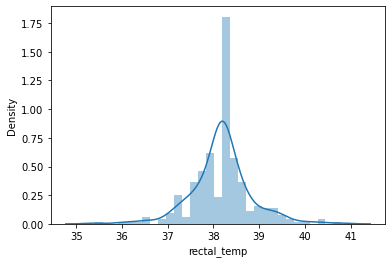

0.005239296055206409


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


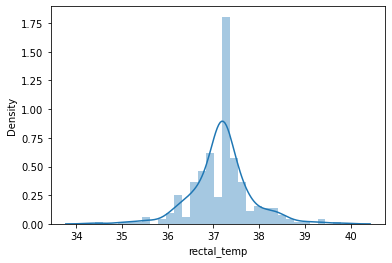

In [36]:
modify_boxcox_value('rectal_temp', 1)

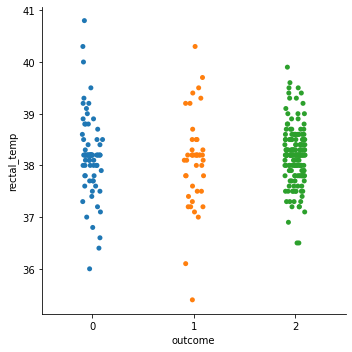

In [37]:
sns.catplot(y="rectal_temp", x="outcome", data=dataset)

## Rectal Temp distribution is  near about the same for all 3 classes of the target var

In [38]:
for outcome_value in dataset['outcome'].unique():
    print(dataset[dataset['outcome'] == outcome_value]['rectal_temp'].median())

38.2
38.2
38.2


In [39]:
dataset.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,TreatedMultipleTimes
0,0,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,8.4,NaN,NaN,0,no,11300,0,0,no,1
1,1,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,85.0,cloudy,2.0,1,no,2208,0,0,no,1
2,0,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,6.7,NaN,NaN,2,no,0,0,0,yes,1
3,1,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,7.2,serosanguious,5.3,0,yes,2208,0,0,yes,1
4,0,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,7.4,NaN,NaN,0,no,4300,0,0,no,1


## pulse

In [40]:
dataset['pulse'].isna().sum()

24

## Median Encoding Data

In [41]:
dataset['pulse'].fillna(dataset['pulse'].median(), inplace=True)

1.1196454292428284


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


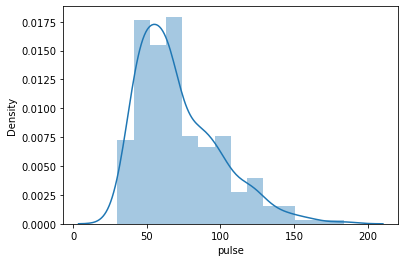

0.0722177515569591


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


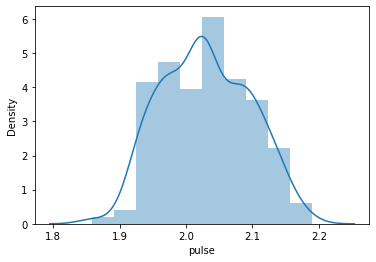

In [42]:
modify_boxcox_value('pulse', -0.4)

## Apply BoxCox Transformation

In [43]:
dataset['transformed_pulse'] = boxcox(dataset['pulse'], -0.4)

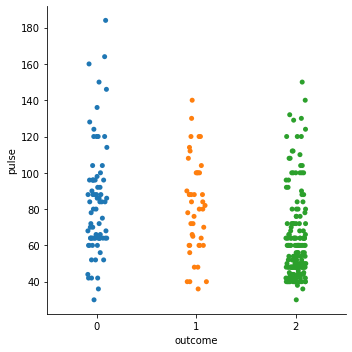

In [44]:
sns.catplot(y="pulse", x="outcome", data=dataset)

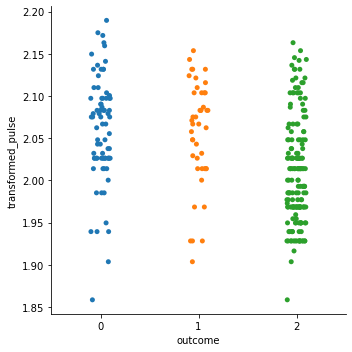

In [45]:
sns.catplot(y="transformed_pulse", x="outcome", data=dataset)

In [46]:
for outcome_value in dataset['outcome'].unique():
    print(outcome_value,'===> ', dataset[dataset['outcome'] == outcome_value]['pulse'].median())

0 ===>  80.0
1 ===>  81.0
2 ===>  56.0


In [47]:
for outcome_value in dataset['outcome'].unique():
    print(outcome_value,'===> ', dataset[dataset['outcome'] == outcome_value]['transformed_pulse'].median())

0 ===>  2.0667844730280334
1 ===>  2.068913386667881
2 ===>  2.000351258489637


## After Feature Scaling, median of all 3 classes is close whereas before it was very large

In [48]:
dataset.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,TreatedMultipleTimes,transformed_pulse
0,0,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,NaN,NaN,0,no,11300,0,0,no,1,2.032133
1,1,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,cloudy,2.0,1,no,2208,0,0,no,1,2.082990
2,0,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,NaN,NaN,2,no,0,0,0,yes,1,1.928369
3,1,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,serosanguious,5.3,0,yes,2208,0,0,yes,1,2.174911
4,0,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,NaN,NaN,0,no,4300,0,0,no,1,2.109944


## respiratory_rate

In [49]:
dataset['respiratory_rate'].isna().sum()

58

In [50]:
dataset['respiratory_rate'].fillna(dataset['respiratory_rate'].median(), inplace=True)

1.9634619692119912


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


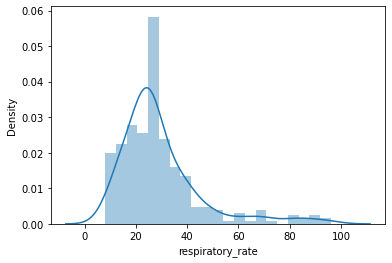

0.04286958937936981


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


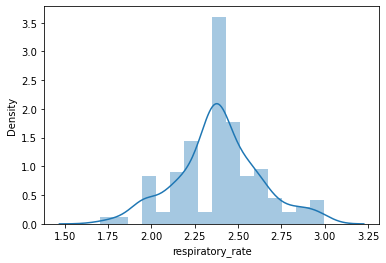

In [51]:
modify_boxcox_value('respiratory_rate', -0.2)

## Apply BoxCox Transformation

In [52]:
dataset['transformed_respiratory_rate'] = boxcox(dataset['respiratory_rate'], -0.2)

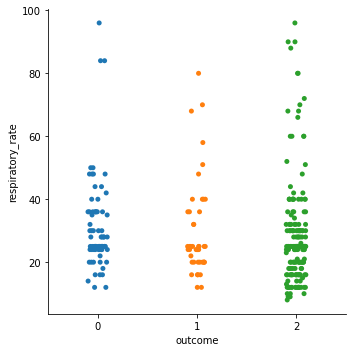

In [53]:
sns.catplot(y="respiratory_rate", x="outcome", data=dataset)

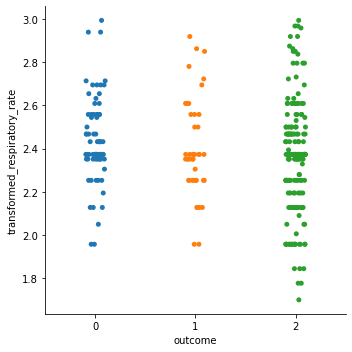

In [54]:
sns.catplot(y="transformed_respiratory_rate", x="outcome", data=dataset)

In [55]:
for outcome_value in dataset['outcome'].unique():
    print(outcome_value,'===> ', dataset[dataset['outcome'] == outcome_value]['respiratory_rate'].median())

0 ===>  25.0
1 ===>  25.0
2 ===>  25.0


In [56]:
for outcome_value in dataset['outcome'].unique():
    print(outcome_value,'===> ', dataset[dataset['outcome'] == outcome_value]['transformed_respiratory_rate'].median())

0 ===>  2.3734721955962326
1 ===>  2.3734721955962326
2 ===>  2.3734721955962326


In [57]:
dataset.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,TreatedMultipleTimes,transformed_pulse,transformed_respiratory_rate
0,0,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,NaN,0,no,11300,0,0,no,1,2.032133,2.432335
1,1,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,2.0,1,no,2208,0,0,no,1,2.082990,2.253599
2,0,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,NaN,2,no,0,0,0,yes,1,1.928369,2.351940
3,1,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,5.3,0,yes,2208,0,0,yes,1,2.174911,2.938828
4,0,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,NaN,0,no,4300,0,0,no,1,2.109944,2.544407


## temp_of_extremities

In [58]:
dataset['temp_of_extremities'].isna().sum()

56

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='temp_of_extremities', ylabel='count'>

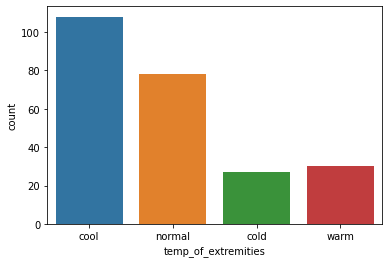

In [59]:
sns.countplot(dataset['temp_of_extremities'])

## Imputing with the most frequent value 

In [60]:
dataset['temp_of_extremities'].value_counts().index[0]

'cool'

In [61]:
dataset['temp_of_extremities'].fillna(dataset['temp_of_extremities'].value_counts().index[0], inplace=True)

<AxesSubplot:xlabel='temp_of_extremities', ylabel='outcome'>

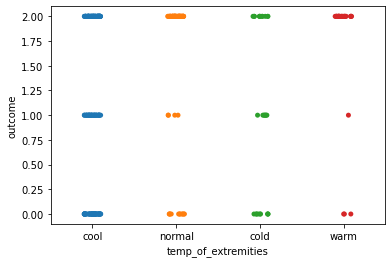

In [62]:
sns.stripplot(x='temp_of_extremities', y='outcome', data=dataset)

## Warm belongs to majorly class 2 
## Cold Normal and Cool are more and less distribited equally

## peripheral_pulse

In [63]:
dataset['peripheral_pulse'].isna().sum()

69

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='peripheral_pulse', ylabel='count'>

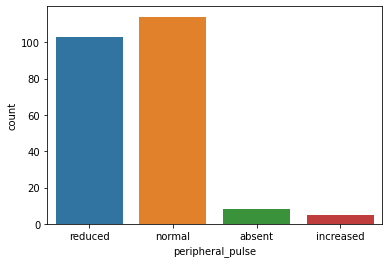

In [64]:
sns.countplot(dataset['peripheral_pulse'])

## Imputing Missing Data with Most Frequent

In [65]:
dataset['peripheral_pulse'].value_counts().index

Index(['normal', 'reduced', 'absent', 'increased'], dtype='object')

In [66]:
dataset['peripheral_pulse'].fillna(dataset['peripheral_pulse'].value_counts().index[0], inplace=True)

<AxesSubplot:xlabel='peripheral_pulse', ylabel='outcome'>

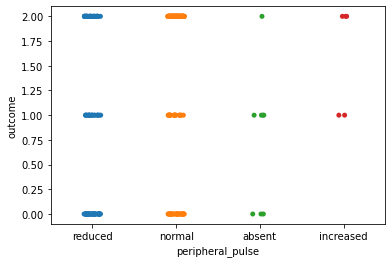

In [67]:
sns.stripplot(x='peripheral_pulse', y='outcome', data=dataset)

# Increased peripheral pulse not present when class 0
## Reduced, normal have equal distribution across all classes 
## For absent, outcome is majorly class 0 and class 1

In [68]:
dataset.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,TreatedMultipleTimes,transformed_pulse,transformed_respiratory_rate
0,0,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,NaN,0,no,11300,0,0,no,1,2.032133,2.432335
1,1,adult,534817,39.2,88.0,20.0,cool,normal,pale_cyanotic,less_3_sec,...,2.0,1,no,2208,0,0,no,1,2.082990,2.253599
2,0,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,NaN,2,no,0,0,0,yes,1,1.928369,2.351940
3,1,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,5.3,0,yes,2208,0,0,yes,1,2.174911,2.938828
4,0,adult,530255,37.3,104.0,35.0,cool,normal,dark_cyanotic,more_3_sec,...,NaN,0,no,4300,0,0,no,1,2.109944,2.544407


## mucous_membrane

In [69]:
dataset['mucous_membrane'].isna().sum()

47

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mucous_membrane', ylabel='count'>

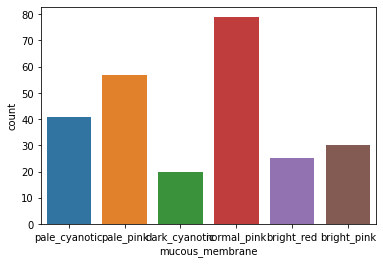

In [70]:
sns.countplot(dataset['mucous_membrane'])

In [71]:
dataset['mucous_membrane'].value_counts().index

Index(['normal_pink', 'pale_pink', 'pale_cyanotic', 'bright_pink',
       'bright_red', 'dark_cyanotic'],
      dtype='object')

## Imputing Missing Data with Most Frequent Data

In [72]:
dataset['mucous_membrane'].fillna(dataset['mucous_membrane'].value_counts().index[0], inplace=True)

<AxesSubplot:xlabel='mucous_membrane', ylabel='outcome'>

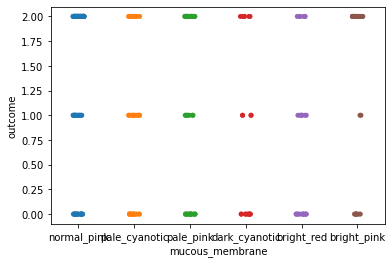

In [73]:
sns.stripplot(x='mucous_membrane', y='outcome', data=dataset)

## All classes of output and mucous membrane have equal distribution

In [74]:
dataset.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,TreatedMultipleTimes,transformed_pulse,transformed_respiratory_rate
0,0,adult,530101,38.5,66.0,28.0,cool,reduced,normal_pink,more_3_sec,...,NaN,0,no,11300,0,0,no,1,2.032133,2.432335
1,1,adult,534817,39.2,88.0,20.0,cool,normal,pale_cyanotic,less_3_sec,...,2.0,1,no,2208,0,0,no,1,2.082990,2.253599
2,0,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,NaN,2,no,0,0,0,yes,1,1.928369,2.351940
3,1,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,5.3,0,yes,2208,0,0,yes,1,2.174911,2.938828
4,0,adult,530255,37.3,104.0,35.0,cool,normal,dark_cyanotic,more_3_sec,...,NaN,0,no,4300,0,0,no,1,2.109944,2.544407


## capillary_refill_time

In [75]:
dataset['capillary_refill_time'].isna().sum()

32

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capillary_refill_time', ylabel='count'>

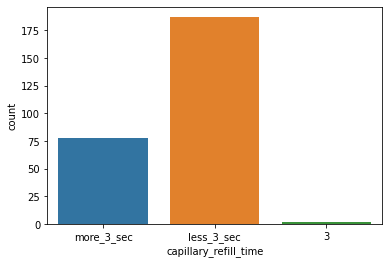

In [76]:
sns.countplot(dataset['capillary_refill_time'])

## Only 2 samples in the dataset with capillary_refill_time == 3 so dropping it 

In [77]:
dataset[dataset['capillary_refill_time'] == '3']['outcome']

78    0
85    2
Name: outcome, dtype: int64

In [78]:
dataset = dataset[dataset['capillary_refill_time'] != '3']

dataset.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,TreatedMultipleTimes,transformed_pulse,transformed_respiratory_rate
0,0,adult,530101,38.5,66.0,28.0,cool,reduced,normal_pink,more_3_sec,...,NaN,0,no,11300,0,0,no,1,2.032133,2.432335
1,1,adult,534817,39.2,88.0,20.0,cool,normal,pale_cyanotic,less_3_sec,...,2.0,1,no,2208,0,0,no,1,2.082990,2.253599
2,0,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,NaN,2,no,0,0,0,yes,1,1.928369,2.351940
3,1,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,5.3,0,yes,2208,0,0,yes,1,2.174911,2.938828
4,0,adult,530255,37.3,104.0,35.0,cool,normal,dark_cyanotic,more_3_sec,...,NaN,0,no,4300,0,0,no,1,2.109944,2.544407


## Imputing Missing Data with Most Frequent Data 

In [79]:
dataset['capillary_refill_time'].fillna(dataset['capillary_refill_time'].value_counts().index[0], inplace=True)

C:\Users\jiten\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<AxesSubplot:xlabel='capillary_refill_time', ylabel='outcome'>

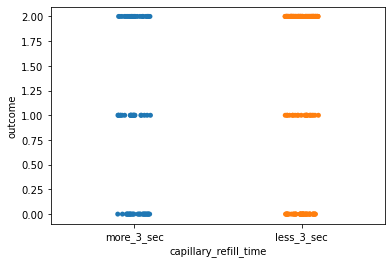

In [80]:
sns.stripplot(x='capillary_refill_time', y='outcome', data=dataset)

## distribution is same for capillary_refill_time with the outcome col

In [81]:
dataset.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,TreatedMultipleTimes,transformed_pulse,transformed_respiratory_rate
0,0,adult,530101,38.5,66.0,28.0,cool,reduced,normal_pink,more_3_sec,...,NaN,0,no,11300,0,0,no,1,2.032133,2.432335
1,1,adult,534817,39.2,88.0,20.0,cool,normal,pale_cyanotic,less_3_sec,...,2.0,1,no,2208,0,0,no,1,2.082990,2.253599
2,0,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,NaN,2,no,0,0,0,yes,1,1.928369,2.351940
3,1,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,5.3,0,yes,2208,0,0,yes,1,2.174911,2.938828
4,0,adult,530255,37.3,104.0,35.0,cool,normal,dark_cyanotic,more_3_sec,...,NaN,0,no,4300,0,0,no,1,2.109944,2.544407


In [82]:
dataset.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data', 'TreatedMultipleTimes', 'transformed_pulse',
       'transformed_respiratory_rate'],
      dtype='object')

## pain

In [83]:
dataset['pain'].isna().sum()

55

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pain', ylabel='count'>

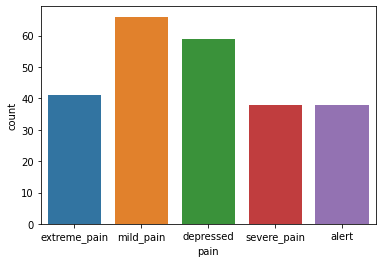

In [84]:
sns.countplot(dataset['pain'])

## Imputing Missing Data with Most Frequent 

In [85]:
dataset['pain'].fillna(dataset['pain'].value_counts().index[0], inplace=True)

C:\Users\jiten\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<AxesSubplot:xlabel='pain', ylabel='outcome'>

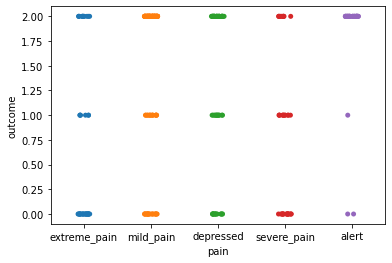

In [86]:
sns.stripplot(x='pain', y='outcome', data=dataset)

## ALert class majorly favours outcome 2

## peristalsis

In [87]:
dataset['peristalsis'].isna().sum()

44

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='peristalsis', ylabel='count'>

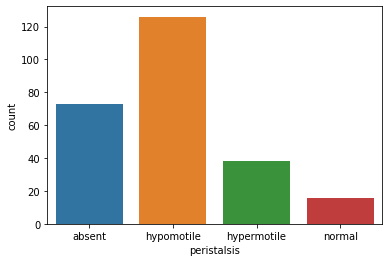

In [88]:
sns.countplot(dataset['peristalsis'])

## Imputing Missing Data with Most Frequent 

In [89]:
dataset['peristalsis'].fillna(dataset['peristalsis'].value_counts().index[0], inplace=True)

C:\Users\jiten\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<AxesSubplot:xlabel='peristalsis', ylabel='outcome'>

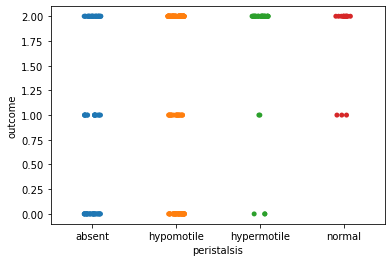

In [90]:
sns.stripplot(x='peristalsis', y='outcome', data=dataset)

## Normal & hypermotile prefers outcome 2 majorly
## absent & hypomotile are equal for all 3 outcome classes

In [91]:
dataset.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data', 'TreatedMultipleTimes', 'transformed_pulse',
       'transformed_respiratory_rate'],
      dtype='object')

## abdominal_distention

In [92]:
dataset['abdominal_distention'].isna().sum()

56

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='abdominal_distention', ylabel='count'>

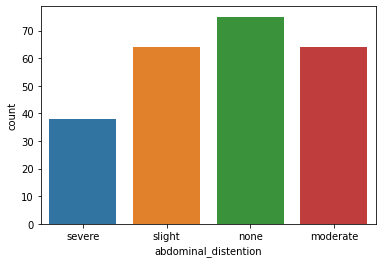

In [93]:
sns.countplot(dataset['abdominal_distention'])

## Imputing Missing Data with Most Frequent 

In [94]:
dataset['abdominal_distention'].fillna(dataset['abdominal_distention'].value_counts().index[0], inplace=True)

C:\Users\jiten\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<AxesSubplot:xlabel='abdominal_distention', ylabel='outcome'>

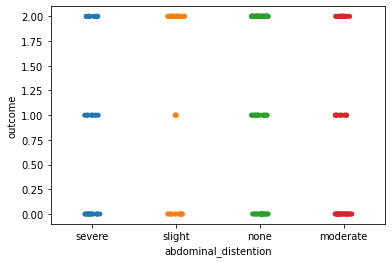

In [95]:
sns.stripplot(x='abdominal_distention', y='outcome', data=dataset)

In [96]:
dataset.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data', 'TreatedMultipleTimes', 'transformed_pulse',
       'transformed_respiratory_rate'],
      dtype='object')

## nasogastric_tube

In [97]:
dataset['nasogastric_tube'].isna().sum()

104

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nasogastric_tube', ylabel='count'>

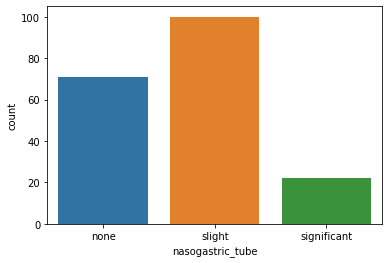

In [98]:
sns.countplot(dataset['nasogastric_tube'])

## Imputing Missing Data with Most Frequent 

In [99]:
dataset['nasogastric_tube'].fillna(dataset['nasogastric_tube'].value_counts().index[0], inplace=True)

C:\Users\jiten\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<AxesSubplot:xlabel='nasogastric_tube', ylabel='outcome'>

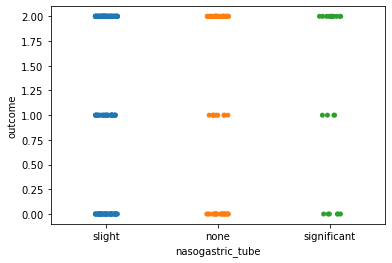

In [100]:
sns.stripplot(x='nasogastric_tube', y='outcome', data=dataset)

## With significant nasogastric tube horse has outcome either 2 or 0 

In [101]:
dataset.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data', 'TreatedMultipleTimes', 'transformed_pulse',
       'transformed_respiratory_rate'],
      dtype='object')

## nasogastric_reflux

In [102]:
dataset['nasogastric_reflux'].isna().sum()

106

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nasogastric_reflux', ylabel='count'>

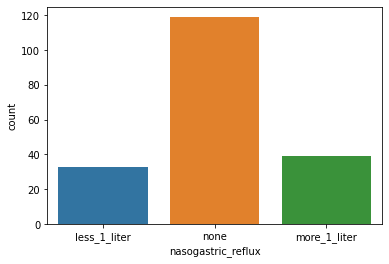

In [103]:
sns.countplot(dataset['nasogastric_reflux'])

## Imputing Missing Data with Most Frequent

In [104]:
dataset['nasogastric_reflux'].fillna(dataset['nasogastric_reflux'].value_counts().index[0], inplace=True)

C:\Users\jiten\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<AxesSubplot:xlabel='nasogastric_reflux', ylabel='outcome'>

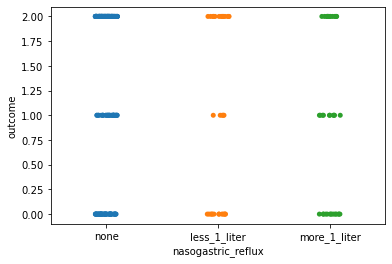

In [105]:
sns.stripplot(x='nasogastric_reflux', y='outcome', data=dataset)

In [106]:
dataset.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data', 'TreatedMultipleTimes', 'transformed_pulse',
       'transformed_respiratory_rate'],
      dtype='object')

## nasogastric_reflux_ph

In [107]:
dataset['nasogastric_reflux_ph'].isna().sum()

244

## To many missing data better to drop it 

In [108]:
del dataset['nasogastric_reflux_ph']

## rectal_exam_feces

In [109]:
dataset['rectal_exam_feces'].isna().sum()

101

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rectal_exam_feces', ylabel='count'>

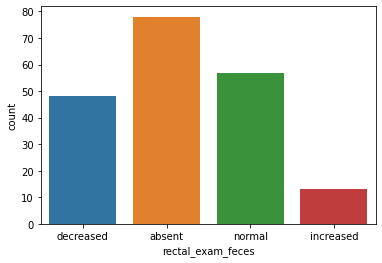

In [110]:
sns.countplot(dataset['rectal_exam_feces'])

## Imputing Missing Data with Most Frequent

In [111]:
dataset['rectal_exam_feces'].fillna(dataset['rectal_exam_feces'].value_counts().index[0], inplace=True)

C:\Users\jiten\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<AxesSubplot:xlabel='rectal_exam_feces', ylabel='outcome'>

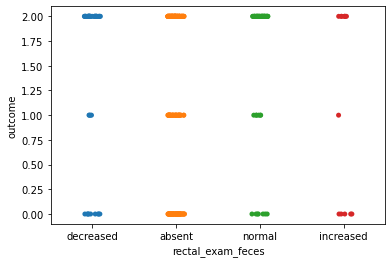

In [112]:
sns.stripplot(x='rectal_exam_feces', y='outcome', data=dataset)

## Normal and Increased value of rectal_exam_feces causes outcome to 2 


In [113]:
dataset.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein',
       'abdomo_appearance', 'abdomo_protein', 'outcome', 'surgical_lesion',
       'lesion_1', 'lesion_2', 'lesion_3', 'cp_data', 'TreatedMultipleTimes',
       'transformed_pulse', 'transformed_respiratory_rate'],
      dtype='object')

## abdomen

In [114]:
dataset['abdomen'].isna().sum()

118

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='abdomen', ylabel='count'>

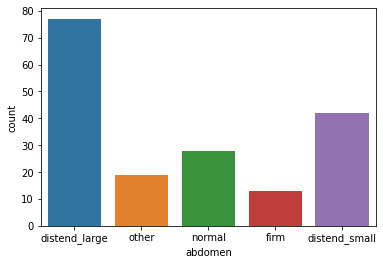

In [115]:
sns.countplot(dataset['abdomen'])

## Imputing Missing Data with Most Frequent 

In [116]:
dataset['abdomen'].fillna(dataset['abdomen'].value_counts().index[0], inplace=True)

C:\Users\jiten\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<AxesSubplot:xlabel='abdomen', ylabel='outcome'>

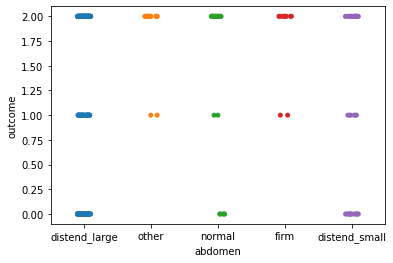

In [117]:
sns.stripplot(x='abdomen', y='outcome', data=dataset)

## Abdomen if firm or other then outcome is not 0

In [118]:
dataset.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein',
       'abdomo_appearance', 'abdomo_protein', 'outcome', 'surgical_lesion',
       'lesion_1', 'lesion_2', 'lesion_3', 'cp_data', 'TreatedMultipleTimes',
       'transformed_pulse', 'transformed_respiratory_rate'],
      dtype='object')

## packed_cell_volume

In [119]:
dataset['packed_cell_volume'].isna().sum()

29

## Imputing Missing Data with Median

In [120]:
dataset['packed_cell_volume'].fillna(dataset['packed_cell_volume'].median(), inplace=True)

C:\Users\jiten\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.7646683138559134


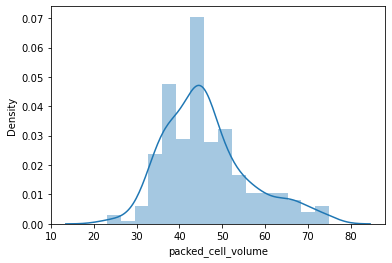

0.048905545383788794


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


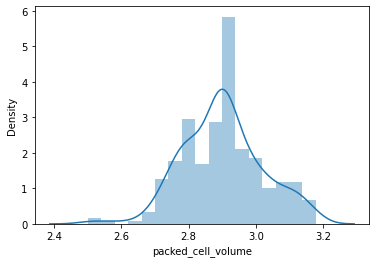

In [121]:
modify_boxcox_value('packed_cell_volume', -0.15)

In [122]:
dataset['packed_cell_volume'] = boxcox(dataset['packed_cell_volume'], -0.15)

C:\Users\jiten\AppData\Local\Temp/ipykernel_16608/2627413445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['packed_cell_volume'] = boxcox(dataset['packed_cell_volume'], -0.15)


<AxesSubplot:xlabel='outcome', ylabel='packed_cell_volume'>

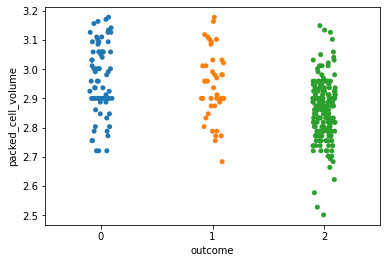

In [123]:
sns.stripplot(y='packed_cell_volume', x='outcome', data=dataset)

In [124]:
for outcome_value in dataset['outcome'].unique():
    print(outcome_value,'===>',dataset[dataset['outcome'] == outcome_value]['packed_cell_volume'].median())

0 ===> 2.9593196385136253
1 ===> 2.9246042839747237
2 ===> 2.8744907777241986


In [125]:
dataset.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein',
       'abdomo_appearance', 'abdomo_protein', 'outcome', 'surgical_lesion',
       'lesion_1', 'lesion_2', 'lesion_3', 'cp_data', 'TreatedMultipleTimes',
       'transformed_pulse', 'transformed_respiratory_rate'],
      dtype='object')

## total_protein

In [126]:
dataset['total_protein'].isna().sum()

33

## IMputing Missing Data with Median 

In [127]:
dataset['total_protein'].fillna(dataset['total_protein'].median(), inplace=True)

C:\Users\jiten\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


1.1801875736315277


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


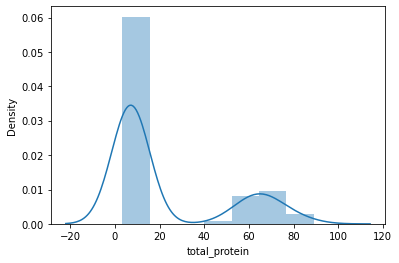

0.002325119779947965


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


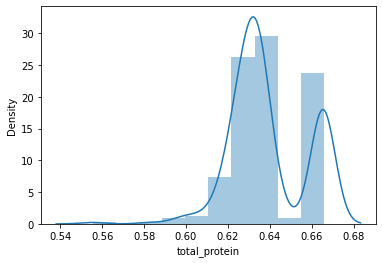

In [128]:
modify_boxcox_value('total_protein', -1.5)

In [129]:
dataset['total_protein'] = boxcox(dataset['total_protein'], -1.5)

C:\Users\jiten\AppData\Local\Temp/ipykernel_16608/2373056772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['total_protein'] = boxcox(dataset['total_protein'], -1.5)


<AxesSubplot:xlabel='outcome', ylabel='total_protein'>

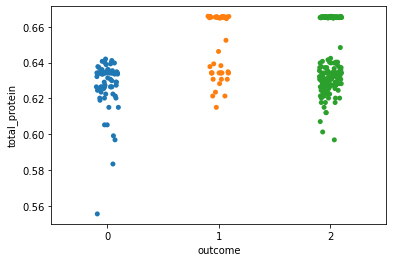

In [130]:
sns.stripplot(y='total_protein', x='outcome', data=dataset)

In [131]:
dataset.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein',
       'abdomo_appearance', 'abdomo_protein', 'outcome', 'surgical_lesion',
       'lesion_1', 'lesion_2', 'lesion_3', 'cp_data', 'TreatedMultipleTimes',
       'transformed_pulse', 'transformed_respiratory_rate'],
      dtype='object')

## abdomo_appearance

In [132]:
dataset['abdomo_appearance'].isna().sum()

163

## Data Missing is more than 50%

In [133]:
del dataset['abdomo_appearance']

In [134]:
dataset.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data', 'TreatedMultipleTimes', 'transformed_pulse',
       'transformed_respiratory_rate'],
      dtype='object')

## abdomo_protein

In [135]:
dataset['abdomo_protein'].isna().sum()

196

## Data Missing is more than 50%

In [136]:
del dataset['abdomo_protein']

## surgical_lesion

In [137]:
dataset['surgical_lesion'].isna().sum()

0

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='surgical_lesion', ylabel='count'>

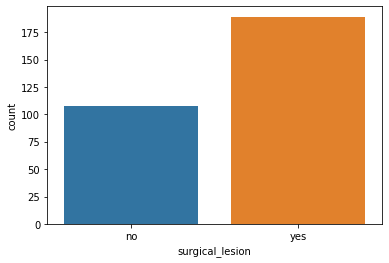

In [138]:
sns.countplot(dataset['surgical_lesion'])

<AxesSubplot:xlabel='outcome', ylabel='surgical_lesion'>

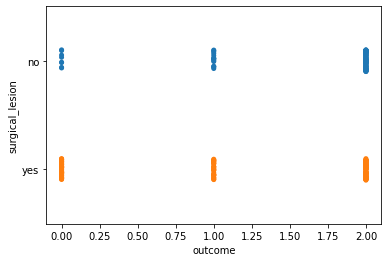

In [139]:
sns.stripplot(y='surgical_lesion', x='outcome', data=dataset)

In [140]:
dataset.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein',
       'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data', 'TreatedMultipleTimes', 'transformed_pulse',
       'transformed_respiratory_rate'],
      dtype='object')

## lesion_1

In [141]:
dataset['lesion_1'].isna().sum()

0

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lesion_1', ylabel='Density'>

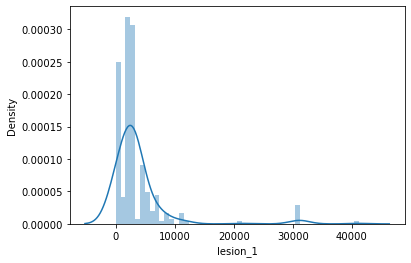

In [142]:
sns.distplot(dataset['lesion_1'])

4.325076805682777


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


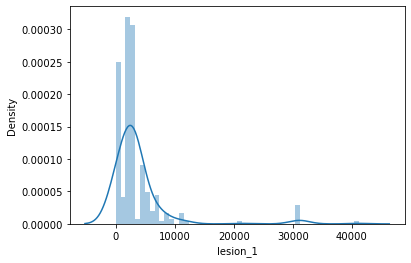

-0.8664563733917758


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


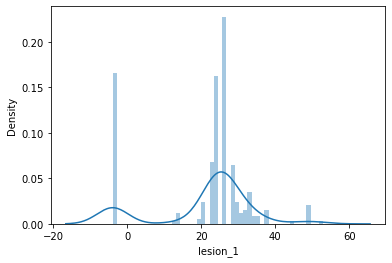

In [143]:
modify_boxcox_value('lesion_1', 0.25)

In [144]:
dataset['lesion_1'] = boxcox(dataset['lesion_1'], 0.25)

C:\Users\jiten\AppData\Local\Temp/ipykernel_16608/688274946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['lesion_1'] = boxcox(dataset['lesion_1'], 0.25)


<AxesSubplot:xlabel='outcome', ylabel='lesion_1'>

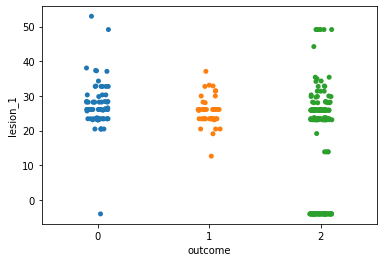

In [145]:
sns.stripplot(y='lesion_1', x='outcome', data=dataset)

In [146]:
dataset.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein',
       'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data', 'TreatedMultipleTimes', 'transformed_pulse',
       'transformed_respiratory_rate'],
      dtype='object')

## lesion_2

In [147]:
dataset['lesion_2'].isna().sum()

0

8.270410921017985


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


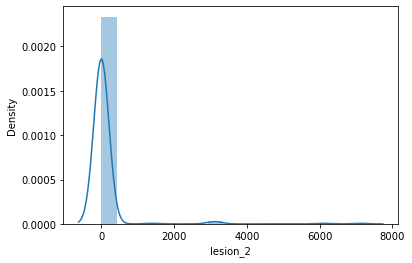

6.313315901829316


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


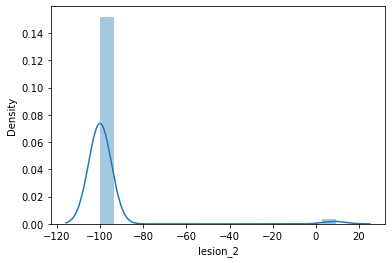

In [148]:
modify_boxcox_value('lesion_2', 0.01)

<AxesSubplot:xlabel='outcome', ylabel='lesion_2'>

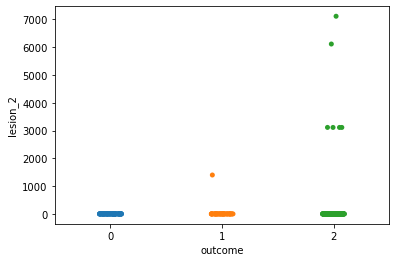

In [149]:
sns.stripplot(y='lesion_2', x='outcome', data=dataset)

## lesion_3

In [150]:
dataset['lesion_3'].isna().sum()

0

17.233687939614057


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


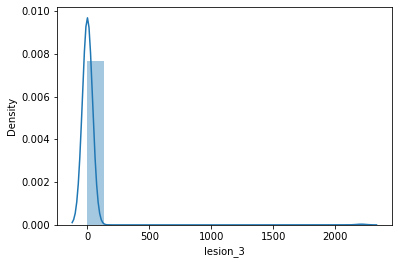

17.233687939614057


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


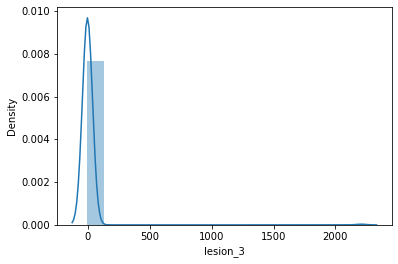

In [151]:
modify_boxcox_value('lesion_3', 1)

<AxesSubplot:xlabel='outcome', ylabel='lesion_3'>

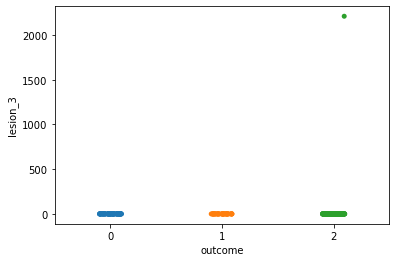

In [152]:
sns.stripplot(y='lesion_3', x='outcome', data=dataset)

## cp_data

In [153]:
dataset['cp_data'].isna().sum()

0

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp_data', ylabel='count'>

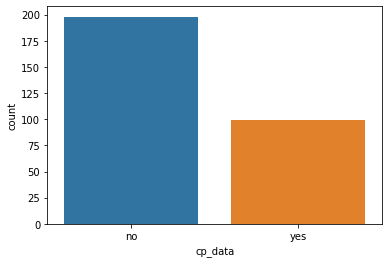

In [154]:
sns.countplot(dataset['cp_data'])

In [155]:
dataset.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein',
       'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data', 'TreatedMultipleTimes', 'transformed_pulse',
       'transformed_respiratory_rate'],
      dtype='object')

In [156]:
features_for_model = [
       'surgery', 'age', 'rectal_temp', 'transformed_pulse', 
       'transformed_respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
        'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
        'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces',
        'abdomen', 'packed_cell_volume', 'total_protein', 'surgical_lesion',
        'lesion_1', 'cp_data', 'TreatedMultipleTimes', 'outcome'
]

In [157]:
modelling_dataset = dataset[features_for_model]

modelling_dataset.head()

,surgery,age,rectal_temp,transformed_pulse,transformed_respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,surgical_lesion,lesion_1,cp_data,TreatedMultipleTimes,outcome
0,0,adult,38.5,2.032133,2.432335,cool,reduced,normal_pink,more_3_sec,extreme_pain,...,none,decreased,distend_large,2.900263,0.639283,no,37.241039,no,1,0
1,1,adult,39.2,2.082990,2.253599,cool,normal,pale_cyanotic,less_3_sec,mild_pain,...,none,absent,other,2.959320,0.665816,no,23.419514,no,1,1
2,0,adult,38.3,1.928369,2.351940,normal,normal,pale_pink,less_3_sec,mild_pain,...,none,normal,normal,2.720898,0.628226,no,-4.000000,yes,1,2
3,1,young,39.1,2.174911,2.938828,cold,normal,dark_cyanotic,more_3_sec,depressed,...,less_1_liter,decreased,distend_large,2.936549,0.632159,yes,23.419514,yes,1,0
4,0,adult,37.3,2.109944,2.544407,cool,normal,dark_cyanotic,more_3_sec,mild_pain,...,none,absent,distend_large,3.171049,0.633549,no,28.391205,no,1,0


## Encoding Categorical Data to Numerical

In [158]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in modelling_dataset.select_dtypes(include=['object']).columns.tolist():
    
    dataset[col] = le.fit_transform(dataset[col])

C:\Users\jiten\AppData\Local\Temp/ipykernel_16608/3182135028.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col] = le.fit_transform(dataset[col])


## Correlation Matrix

In [159]:
dataset.corr()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,TreatedMultipleTimes,transformed_pulse,transformed_respiratory_rate
surgery,1.000000,0.089255,0.126044,-0.036666,0.174904,0.178555,-0.182394,0.118506,0.043808,0.078021,...,0.010150,-0.183416,0.602053,0.446919,0.098765,0.047192,0.004865,-0.015382,0.174101,0.157576
age,0.089255,1.000000,0.697123,0.178481,0.505028,0.374703,-0.012788,0.030292,-0.169201,-0.036581,...,-0.214290,-0.103116,0.044360,0.040217,0.017510,0.196033,0.078621,-0.101220,0.411767,0.316789
hospital_number,0.126044,0.697123,1.000000,0.131530,0.336443,0.248691,0.002094,0.026227,-0.154936,0.019044,...,-0.272007,-0.107952,0.102173,0.121571,-0.050802,-0.021102,0.095184,-0.056928,0.278429,0.197784
rectal_temp,-0.036666,0.178481,0.131530,1.000000,0.196288,0.230299,-0.046756,0.012822,-0.148632,0.117844,...,-0.022124,0.014233,-0.015499,0.007450,-0.061109,0.028721,0.056904,0.094921,0.199749,0.220309
pulse,0.174904,0.505028,0.336443,0.196288,1.000000,0.433575,-0.276351,0.252236,-0.048830,0.381073,...,-0.142141,-0.337296,0.252430,0.255811,0.000941,0.102339,0.114815,-0.018637,0.958728,0.439550
respiratory_rate,0.178555,0.374703,0.248691,0.230299,0.433575,1.000000,-0.030181,0.129136,-0.084919,0.076722,...,-0.145180,-0.070479,0.201227,0.216727,-0.011237,0.147202,-0.049026,-0.053488,0.400866,0.917317
temp_of_extremities,-0.182394,-0.012788,0.002094,-0.046756,-0.276351,-0.030181,1.000000,-0.202233,-0.098187,-0.251165,...,0.030107,0.286186,-0.218445,-0.186618,0.027221,-0.027325,-0.048797,-0.075852,-0.279131,-0.051373
peripheral_pulse,0.118506,0.030292,0.026227,0.012822,0.252236,0.129136,-0.202233,1.000000,0.070562,0.256476,...,-0.050844,-0.164226,0.168686,0.223877,0.002739,-0.025003,0.072242,0.029015,0.264917,0.163388
mucous_membrane,0.043808,-0.169201,-0.154936,-0.148632,-0.048830,-0.084919,-0.098187,0.070562,1.000000,-0.034304,...,-0.005040,0.061135,0.079097,0.110920,0.029471,0.001190,-0.106158,0.073946,-0.044703,-0.056950
capillary_refill_time,0.078021,-0.036581,0.019044,0.117844,0.381073,0.076722,-0.251165,0.256476,-0.034304,1.000000,...,-0.044292,-0.272201,0.164838,0.187465,0.006037,-0.034688,0.064923,0.221682,0.418795,0.120746


<AxesSubplot:>

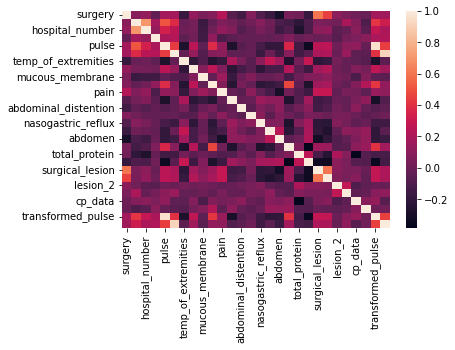

In [160]:
sns.heatmap(dataset.corr())

## Train Test Split Dataset

In [161]:
from sklearn.model_selection import train_test_split   

X_train, X_test, y_train, y_test = train_test_split(dataset.drop('outcome', axis=1), dataset['outcome'], test_size=0.2, random_state=42)

## Train LogisticRegression Model

In [162]:
from sklearn.linear_model import LogisticRegression

In [163]:
model = LogisticRegression(random_state=0).fit(X_train, y_train)

## Evaluate the Model

In [164]:
from sklearn.metrics import accuracy_score

accuracy_score(model.predict(X_test), y_test)

0.6166666666666667

## Conclusion

1. Understood importance of EDA 
2. Performed EDA on the horse dataset
3. Used Logistic Regression to solve Classfication Problem for predicting horse outcome after hospitalization 

### References

1. [EDA](https://www.geeksforgeeks.org/what-is-exploratory-data-analysis/#:~:text=Exploratory%20Data%20Analysis%20(EDA)%20is,statistical%20summary%20and%20graphical%20representations.)
2. [Hourse Colic Dataset](https://www.kaggle.com/uciml/horse-colic)
3. [Sklearn Python Package](https://scikit-learn.org/stable/index.html)